<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_i1-final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
import math
import pickle
from functools import reduce

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')
root_dir = "/content/drive/My Drive/model-i1-less-features"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Importing Dataset from GitHub

Test Data

In [0]:
df0_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-15-m-12-r0.csv?token=AKVFSOCE3FVVG5OF4ZQWNJ263FQWA')
df0_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-15-m-7-r0.csv?token=AKVFSODFHFWKKECKFAQE2DS63FQFC')
df0_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-15-m-11-r0.csv?token=AKVFSOH52ILNZX4OJIY644263FPWO')

In [0]:
df1_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-15-m-12-r1.csv?token=AKVFSOC5UXUUHGMH6WRX2DS63IADW')
df1_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-15-m-7-r1.csv?token=AKVFSOCEMAZYITSUEMAWNZC63IAD4')
df1_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-15-m-11-r1.csv?token=AKVFSOH2WAU53NLLXJKHJZK63H7KM')

In [0]:
df2_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-15-m-12-r2.csv?token=AKVFSOHNXJCRW2Y5EHJ525263ICWK')
df2_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-15-m-7-r2.csv?token=AKVFSOFOWY6S2IPVTC5I3OK63ICWM')
df2_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-15-m-11-r2.csv?token=AKVFSOFQUUBBYNVV7YQ5NPS63IB6M')

In [0]:
df3_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-15-m-12-r3.csv?token=AKVFSOE4XEDCYO4VR63SV2C63IE7C')
df3_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-15-m-7-r3.csv?token=AKVFSOCVVADXM4BZ62CH6JC63IE7I')
df3_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-15-m-11-r3.csv?token=AKVFSOBVUGL7OSHKLIU3Z3S63IDNK')

In [0]:
df4_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-15-m-12-r4.csv?token=AKVFSOELY7EYPZC6QZRXOJ263INYG')
df4_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-15-m-7-r4.csv?token=AKVFSOA7ZSSOS55SHOQWE4K63INYK')
df4_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-15-m-11-r4.csv?token=AKVFSOGGFTANMBL73NT4MQS63INLS')

In [0]:
df5_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-12-r5.csv?token=AKVFSOFGZZNKP3BWO7VOX4263IPSK')
df5_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-7-r5.csv?token=AKVFSOF5WUCWSF74MB4QTN263IPSO')
df5_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-11-r5.csv?token=AKVFSOG4BTBXRS6QBNRTBWS63IPFS')

In [0]:
df6_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-12-r6.csv?token=AKVFSOGFXPLRBVFF2CSTSU263I2RE')
df6_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-7-r6.csv?token=AKVFSOCFZYWDIHTDXDL47DC63I2RG')
df6_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-11-r6.csv?token=AKVFSODRMP7WFOTNGA43XEC63I2IO')

In [0]:
df7_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-15-m-12-r7.csv?token=AKVFSOGQXPD3OXG6OLC3P6S63I3WS')
df7_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-15-m-7-r7.csv?token=AKVFSOHR6N2LIBQVGJQFB4C63I3WY')
df7_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-15-m-11-r7.csv?token=AKVFSOAXOHNH6CKQ6IUNANS63I3MQ')

In [0]:
df8_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-12-r8.csv?token=AKVFSOAKB2AYPBWMBTZQIB263I46G')
df8_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-7-r8.csv?token=AKVFSOBOOWHOYC7EACQCDNC63I46I')
df8_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-11-r8.csv?token=AKVFSOC4TLQUBVRJBWFEK6C63I4LO')

In [0]:
df9_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-12-r9.csv?token=AKVFSOBOHTVG3MJMJANN6WK63I6C2')
df9_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-7-r9.csv?token=AKVFSOB6G5XYPI2M2MYYVWK63I6C4')
df9_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-11-r9.csv?token=AKVFSOB5GJ644WPZILMYKES63I5X6')

In [0]:
df10_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-15-m-12-r10.csv?token=AKVFSOFVGIPVBC454BZZIYS63JR4K')
df10_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-15-m-7-r10.csv?token=AKVFSOBYE5BQE7QZ4AMG2NS63JR4O')
df10_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-15-m-11-r10.csv?token=AKVFSOF6CTQCKY7F6NUI5SS63I6YO')

In [0]:
df11_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-15-m-12-r11.csv?token=AKVFSODFX632MJC3CW5FU7S63JEEK')
df11_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-15-m-7-r11.csv?token=AKVFSOGYGNPHWB42VH7Q2GK63JEEQ')
df11_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-15-m-11-r11.csv?token=AKVFSOBY5KWVYP7MVPVLSKS63JDDQ')

In [0]:
df12_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-12-r12.csv?token=AKVFSOAQGBVPWTBK23STAH263JFYI')
df12_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-7-r12.csv?token=AKVFSOACXGKWQCFQJMZE7OK63JFYM')
df12_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-11-r12.csv?token=AKVFSODJ2VS24KRBYQIJD3S63JFGM')

In [0]:
df13_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-15-m-12-r13.csv?token=AKVFSOAXXM3UU5GITOILMOC63JHPW')
df13_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-15-m-7-r13.csv?token=AKVFSOFKNO7OWYS5BRNHQZK63JHP4')
df13_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-15-m-11-r13.csv?token=AKVFSOCO6G7PCJACTCL6OTK63JGKO')

In [0]:
df14_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-15-m-12-r14.csv?token=AKVFSOCCWK2AKL76QQQFCWK63JIXI')
df14_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-15-m-7-r14.csv?token=AKVFSOFFLTHP6UWBLP76WXK63JIXM')
df14_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-15-m-11-r14.csv?token=AKVFSOH66ZAW6U6NJIEDAWK63JIH6')

In [0]:
df15_1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-12-r15.csv?token=AKVFSOFCIIATN53BXPZZYAS63JK5C')
df15_2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-7-r15.csv?token=AKVFSOGNEHOF57IWO2H7FXC63JK5G')
df15_3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-11-r15.csv?token=AKVFSOAFEHDGNJ6UICOJZQS63JJVK')

In [22]:
print(df15_3.shape)
df15_3

(88873, 26)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,3,0,1,1,4,3,9,15,15,23,7,3,2,0,0.0,4,60,1,60,60,0,12,3,27,0
1,80,0,3,4,1,1,5,17,23,7,15,15,3,2,2,1.0,12,59,2,60,118,0,12,20,340,0
2,81,0,3,4,2,2,5,17,23,7,15,15,3,2,2,1.0,13,58,3,60,174,0,48,20,340,0
3,82,0,3,4,3,2,5,17,23,7,15,15,3,2,2,1.0,14,57,4,60,228,0,72,20,340,0
4,83,0,3,4,4,2,5,17,23,7,15,15,3,2,2,1.0,15,56,5,60,280,0,96,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88868,3276374,3,0,5,2,2,3,9,15,15,27,11,30095,1,0,0.0,11,5,20,24,100,0,601900,15,135,0
88869,3276381,3,0,5,3,2,3,9,15,15,27,11,30095,1,0,0.0,18,4,21,24,84,0,902850,15,135,0
88870,3276388,3,0,5,4,2,3,9,15,15,27,11,30095,1,0,0.0,25,3,22,24,66,0,1203800,15,135,0
88871,3276395,3,0,5,5,3,3,9,15,15,27,11,30095,1,0,0.0,32,2,23,24,46,0,2257125,15,135,0


In [0]:
def roundup(x):
  return int(math.ceil(x / 1000.0)) * 1000

In [0]:
def timecount(df):
    timearr = []
    interval = 999
    count = 0
    for index, row in df.iterrows():
        if row["timestamp"]<=interval :
            count+=1
        else:
            timearr.append([interval+1,count])
            count=1
            if (row["timestamp"] == roundup(row["timestamp"])):
              interval = row["timestamp"]+999
            else:
              interval = roundup(row["timestamp"])-1
    timearr.append([interval+1,count])
    return timearr

In [0]:
def standardize(df):
  test_X = df.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
  test_Y = df['target']
  x = test_X.values
  min_max_scaler = preprocessing.MinMaxScaler()
  columns = test_X.columns
  x_scaled = min_max_scaler.fit_transform(x)
  test_X = pd.DataFrame(x_scaled)
  test_X.columns = columns
  print(test_X[test_X.duplicated()].shape)
  return test_X,test_Y

In [0]:
xgb_r0 = pickle.load(open(root_dir+"/xgbc-r0l-i1.pickle.dat", "rb"))
xgb_r1 = pickle.load(open(root_dir+"/xgbc-r1l-i1.pickle.dat", "rb"))
xgb_r2 = pickle.load(open(root_dir+"/xgbc-r2l-i1.pickle.dat", "rb"))
xgb_r3 = pickle.load(open(root_dir+"/xgbc-r3l-i1.pickle.dat", "rb"))
xgb_r4 = pickle.load(open(root_dir+"/xgbc-r4l-i1.pickle.dat", "rb"))
xgb_r5 = pickle.load(open(root_dir+"/xgbc-r5l-i1.pickle.dat", "rb"))
xgb_r6 = pickle.load(open(root_dir+"/xgbc-r6l-i1.pickle.dat", "rb"))
xgb_r7 = pickle.load(open(root_dir+"/xgbc-r7l-i1.pickle.dat", "rb"))
xgb_r8 = pickle.load(open(root_dir+"/xgbc-r8l-i1.pickle.dat", "rb"))
xgb_r9 = pickle.load(open(root_dir+"/xgbc-r9l-i1.pickle.dat", "rb"))
xgb_r10 = pickle.load(open(root_dir+"/xgbc-r10l-i1.pickle.dat", "rb"))
xgb_r11 = pickle.load(open(root_dir+"/xgbc-r11l-i1.pickle.dat", "rb"))
xgb_r12 = pickle.load(open(root_dir+"/xgbc-r12l-i1.pickle.dat", "rb"))
xgb_r13 = pickle.load(open(root_dir+"/xgbc-r13l-i1.pickle.dat", "rb"))
xgb_r14 = pickle.load(open(root_dir+"/xgbc-r14l-i1.pickle.dat", "rb"))
xgb_r15 = pickle.load(open(root_dir+"/xgbc-r15l-i1.pickle.dat", "rb"))

In [27]:
df0_1.shape

(97992, 26)

In [0]:
def window(j):

  timearr0 = timecount(df0_3)
  timearr1 = timecount(df1_3)
  timearr2 = timecount(df2_3)
  timearr3 = timecount(df3_3)
  timearr4 = timecount(df4_3)
  timearr5 = timecount(df5_3)
  timearr6 = timecount(df6_3)
  timearr7 = timecount(df7_3)
  timearr8 = timecount(df8_3)
  timearr9 = timecount(df9_3)
  timearr10 = timecount(df10_3)
  timearr11 = timecount(df11_3)
  timearr12 = timecount(df12_3)
  timearr13 = timecount(df13_3)
  timearr14 = timecount(df14_3)
  timearr15 = timecount(df15_3)

  max_limit = max(timearr0[-1],timearr1[-1],timearr2[-1],timearr3[-1],timearr4[-1],timearr5[-1],timearr6[-1],timearr7[-1],timearr8[-1],timearr9[-1],timearr10[-1],timearr11[-1],timearr12[-1],timearr13[-1],timearr14[-1],timearr15[-1])

  print(max_limit[0])
  
  def prediction(df,timearr,xgb):

    test_X,test_Y = standardize (df)
    counter = timearr[0][1]
    result = []
    begin = counter
    text_X0 = test_X[:counter]
    text_Y0 = test_Y[:counter]

    #try:
    #      kfold = KFold(n_splits=10, random_state=7, shuffle = True)
    #      results = cross_val_score(xgb, text_X0, text_Y0, cv=kfold)
    #      result.append([timearr[0][0],results.mean()*100,timearr[0][1]]) 
    #except:
    y_pred_xgbc_test= xgb.predict(text_X0)
    xgbc_score_test = accuracy_score(text_Y0,y_pred_xgbc_test)
    result.append([timearr[0][0],xgbc_score_test*100,timearr[0][1]]) 

    for i in range(1,len(timearr)):

      counter += timearr[i][1]

      text_X0 = test_X[begin:counter]
      text_Y0 = test_Y[begin:counter]

      #try:
      #    kfold = KFold(n_splits=10, random_state=7, shuffle = True)
      #    results = cross_val_score(xgb, text_X0, text_Y0, cv=kfold)
      #    result.append([timearr[i][0],results.mean()*100,timearr[i][1]]) 
      #except:
      y_pred_xgbc_test= xgb.predict(text_X0)
      xgbc_score_test = accuracy_score(text_Y0,y_pred_xgbc_test)
      result.append([timearr[i][0],xgbc_score_test*100,timearr[i][1]])

      begin = counter

    return result

  result0 = prediction(df0_3,timearr0,xgb_r0)
  result1 = prediction(df1_3,timearr1,xgb_r1)
  result2 = prediction(df2_3,timearr2,xgb_r2)
  result3 = prediction(df3_3,timearr3,xgb_r3)
  result4 = prediction(df4_3,timearr4,xgb_r4)
  result5 = prediction(df5_3,timearr5,xgb_r5)
  result6 = prediction(df6_3,timearr6,xgb_r6)
  result7 = prediction(df7_3,timearr7,xgb_r7)
  result8 = prediction(df8_3,timearr8,xgb_r8)
  result9 = prediction(df9_3,timearr9,xgb_r9)
  result10 = prediction(df10_3,timearr10,xgb_r10)
  result11 = prediction(df11_3,timearr11,xgb_r11)
  result12 = prediction(df12_3,timearr12,xgb_r12)
  result13 = prediction(df13_3,timearr13,xgb_r13)
  result14 = prediction(df14_3,timearr14,xgb_r14)
  result15 = prediction(df15_3,timearr15,xgb_r15)

  indexarr = []

  for i in range(1000,int(max_limit[0])+1,1000):
    indexarr.append(i)

  df = pd.DataFrame()
  df = df.assign(index=indexarr)

  df0 = pd.DataFrame()
  df0 = df0.assign(index=[i[0] for i in result0])
  df0 = df0.assign(count0=[i[1] for i in result0])
  df0 = df0.assign(count0_weight=[i[2] for i in result0])
  print(df0.head(15))

  df1 = pd.DataFrame()
  df1 = df1.assign(index=[i[0] for i in result1])
  df1 = df1.assign(count1=[i[1] for i in result1])
  df1 = df1.assign(count1_weight=[i[2] for i in result1])

  df2= pd.DataFrame()
  df2 = df2.assign(index=[i[0] for i in result2])
  df2 = df2.assign(count2=[i[1] for i in result2])
  df2 = df2.assign(count2_weight=[i[2] for i in result2])

  df3 = pd.DataFrame()
  df3 = df3.assign(index=[i[0] for i in result3])
  df3 = df3.assign(count3=[i[1] for i in result3])
  df3 = df3.assign(count3_weight=[i[2] for i in result3])  

  df4 = pd.DataFrame()
  df4 = df4.assign(index=[i[0] for i in result4])
  df4 = df4.assign(count4=[i[1] for i in result4])
  df4 = df4.assign(count4_weight=[i[2] for i in result4])  

  df5 = pd.DataFrame()
  df5 = df5.assign(index=[i[0] for i in result5])
  df5 = df5.assign(count5=[i[1] for i in result5])
  df5 = df5.assign(count5_weight=[i[2] for i in result5])  

  df6 = pd.DataFrame()
  df6 = df6.assign(index=[i[0] for i in result6])
  df6 = df6.assign(count6=[i[1] for i in result6])
  df6 = df6.assign(count6_weight=[i[2] for i in result6])  

  df7= pd.DataFrame()
  df7 = df7.assign(index=[i[0] for i in result7])
  df7 = df7.assign(count7=[i[1] for i in result7])
  df7 = df7.assign(count7_weight=[i[2] for i in result7])  

  df8 = pd.DataFrame()
  df8 = df8.assign(index=[i[0] for i in result8])
  df8 = df8.assign(count8=[i[1] for i in result8])
  df8 = df8.assign(count8_weight=[i[2] for i in result8])  

  df9 = pd.DataFrame()
  df9 = df9.assign(index=[i[0] for i in result9])
  df9 = df9.assign(count9=[i[1] for i in result9])
  df9 = df9.assign(count9_weight=[i[2] for i in result9])  

  df10 = pd.DataFrame()
  df10 = df10.assign(index=[i[0] for i in result10])
  df10 = df10.assign(count10=[i[1] for i in result10])
  df10 = df10.assign(count10_weight=[i[2] for i in result10])  

  df11 = pd.DataFrame()
  df11 = df11.assign(index=[i[0] for i in result11])
  df11 = df11.assign(count11=[i[1] for i in result11])
  df11 = df11.assign(count11_weight=[i[2] for i in result11])  

  df12= pd.DataFrame()
  df12 = df12.assign(index=[i[0] for i in result12])
  df12 = df12.assign(count12=[i[1] for i in result12])
  df12 = df12.assign(count12_weight=[i[2] for i in result12])  

  df13 = pd.DataFrame()
  df13 = df13.assign(index=[i[0] for i in result13])
  df13 = df13.assign(count13=[i[1] for i in result13])
  df13 = df13.assign(count13_weight=[i[2] for i in result13])  

  df14 = pd.DataFrame()
  df14 = df14.assign(index=[i[0] for i in result14])
  df14 = df14.assign(count14=[i[1] for i in result14])
  df14 = df14.assign(count14_weight=[i[2] for i in result14])  

  df15 = pd.DataFrame()
  df15 = df15.assign(index=[i[0] for i in result15])
  df15 = df15.assign(count15=[i[1] for i in result15])
  df15 = df15.assign(count15_weight=[i[2] for i in result15])  

  df0 = pd.merge(df,df0,on='index',how='left')
  df1 = pd.merge(df,df1,on='index',how='left')
  df2 = pd.merge(df,df2,on='index',how='left')
  df3 = pd.merge(df,df3,on='index',how='left')
  df4 = pd.merge(df,df4,on='index',how='left')
  df5 = pd.merge(df,df5,on='index',how='left')
  df6 = pd.merge(df,df6,on='index',how='left')
  df7 = pd.merge(df,df7,on='index',how='left')
  df8 = pd.merge(df,df8,on='index',how='left')
  df9 = pd.merge(df,df9,on='index',how='left')
  df10 = pd.merge(df,df10,on='index',how='left')
  df11 = pd.merge(df,df11,on='index',how='left')
  df12 = pd.merge(df,df12,on='index',how='left')
  df13 = pd.merge(df,df13,on='index',how='left')
  df14 = pd.merge(df,df14,on='index',how='left')
  df15 = pd.merge(df,df15,on='index',how='left')

  dfs = [df0, df1, df2, df3, df4, df5, df6,df7,df8,df9,df10,df11,df12,df13,df14,df15]

  df_final = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

  print(df_final.isnull().sum())

  df_final.to_csv('fft-i1-test-less-'+str(j)+'.csv',index=False)

  print(df_final.head())


In [29]:
window(1)

3279000
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
      index      count0  count0_weight
0    1000.0  100.000000             61
1    2000.0    0.000000             56
2    3000.0   98.550725             69
3    4000.0    0.000000             38
4    5000.0  100.000000             73
5    6000.0   88.679245             53
6    7000.0    0.000000             58
7    8000.0  100.000000             73
8    9000.0    0.000000             63
9   10000.0  100.000000            102
10  11000.0    5.882353             68
11  12000.0    0.000000             85
12  13000.0   88.888889             99
13  14000.0  100.000000             74
14  15000.0  100.000000             68
index                0
count0             886
count0_weight      886
count1            1026
count1_weight     1026
count2            1300
count2_weight     1300
count3            1537
count3_weight     1537
count4             775
count4_wei

In [31]:
window(2)

3276000
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
      index      count0  count0_weight
0    1000.0   59.016393             61
1    2000.0  100.000000             58
2    3000.0  100.000000             66
3    4000.0  100.000000             39
4    5000.0    0.000000             73
5    6000.0   82.000000             50
6    7000.0  100.000000             61
7    8000.0  100.000000             72
8    9000.0  100.000000             70
9   10000.0  100.000000             99
10  11000.0    0.000000             63
11  12000.0   66.326531             98
12  13000.0    0.000000             84
13  14000.0  100.000000             74
14  15000.0  100.000000             64
index                0
count0             801
count0_weight      801
count1             949
count1_weight      949
count2            1122
count2_weight     1122
count3            1290
count3_weight     1290
count4             725
count4_wei

In [33]:
window(3)

3277000
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
      index      count0  count0_weight
0    1000.0    6.557377             61
1    2000.0    8.620690             58
2    3000.0  100.000000             67
3    4000.0  100.000000             39
4    5000.0    0.000000             72
5    6000.0    0.000000             50
6    7000.0    0.000000             60
7    8000.0    0.000000             72
8    9000.0    0.000000             72
9   10000.0  100.000000             99
10  11000.0   11.290323             62
11  12000.0  100.000000            102
12  13000.0    0.000000             85
13  14000.0  100.000000             70
14  15000.0  100.000000             63
index                0
count0             892
count0_weight      892
count1            1004
count1_weight     1004
count2            1173
count2_weight     1173
count3            1341
count3_weight     1341
count4             860
count4_wei

In [0]:
window(4)

3267000.0
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0, 10)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0, 10)
(0, 10)
      index  count0  count0_weight
0    1000.0   100.0             61
1    2000.0   100.0             63
2    3000.0   100.0             62
3    4000.0   100.0             39
4    5000.0     0.0             72
5    6000.0    25.0             56
6    7000.0   100.0             62
7    8000.0     0.0             73
8    9000.0     0.0             70
9   10000.0   100.0            101
10  11000.0     0.0             63
11  12000.0   100.0            109
12  13000.0   100.0             80
13  14000.0   100.0             67
14  15000.0   100.0             72
index                0
count0             884
count0_weight      884
count1            1026
count1_weight     1026
count2            1283
count2_weight     1283
count3            1528
count3_weight     1528
count4             636
count4_weight      636
count5             766
count5_weight      766
count6             818
count6_weight      818
count7             807
count7_weight      807
count8            1346
count8_wei

In [0]:
window(5)

3274000
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
      index      count0  count0_weight
0    1000.0  100.000000             61
1    2000.0   52.380952             63
2    3000.0    4.838710             62
3    4000.0    0.000000             44
4    5000.0   32.835821             67
5    6000.0  100.000000             56
6    7000.0   44.444444             63
7    8000.0    0.000000             76
8    9000.0  100.000000             64
9   10000.0  100.000000            103
10  11000.0    0.000000             63
11  12000.0  100.000000            103
12  13000.0    8.235294             85
13  14000.0  100.000000             72
14  15000.0  100.000000             66
index                0
count0             897
count0_weight      897
count1            1035
count1_weight     1035
count2            1315
count2_weight     1315
count3            1834
count3_weight     1834
count4             722
count4_wei

In [0]:
window(6)

3267000.0
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0, 10)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0, 10)
(0, 10)
      index      count0  count0_weight
0    1000.0  100.000000             61
1    2000.0  100.000000             64
2    3000.0  100.000000             61
3    4000.0    0.000000             39
4    5000.0    0.000000             72
5    6000.0    5.263158             57
6    7000.0  100.000000             63
7    8000.0    0.000000             72
8    9000.0    0.000000             69
9   10000.0  100.000000            100
10  11000.0    0.000000             60
11  12000.0  100.000000            109
12  13000.0   37.974684             79
13  14000.0  100.000000             72
14  15000.0  100.000000             67
index                0
count0             920
count0_weight      920
count1            1032
count1_weight     1032
count2            1202
count2_weight     1202
count3            1561
count3_weight     1561
count4             748
count4_weight      748
count5             773
count5_weight      773
count6             640
count6_weight      640
count7         

In [0]:
window(7)

3273000
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
      index      count0  count0_weight
0    1000.0  100.000000             61
1    2000.0  100.000000             63
2    3000.0  100.000000             62
3    4000.0    0.000000             44
4    5000.0   76.119403             67
5    6000.0   12.500000             56
6    7000.0  100.000000             65
7    8000.0    0.000000             69
8    9000.0    0.000000             70
9   10000.0  100.000000            103
10  11000.0    0.000000             69
11  12000.0  100.000000             95
12  13000.0   22.619048             84
13  14000.0  100.000000             75
14  15000.0  100.000000             71
index                0
count0             865
count0_weight      865
count1            1008
count1_weight     1008
count2            1438
count2_weight     1438
count3            1844
count3_weight     1844
count4             739
count4_wei

In [0]:
window(8)

3267000
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0, 10)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0, 10)
(0, 10)
      index      count0  count0_weight
0    1000.0  100.000000             61
1    2000.0  100.000000             62
2    3000.0  100.000000             63
3    4000.0  100.000000             39
4    5000.0    0.000000             72
5    6000.0   23.636364             55
6    7000.0  100.000000             65
7    8000.0    0.000000             70
8    9000.0    0.000000             71
9   10000.0  100.000000             98
10  11000.0    0.000000             70
11  12000.0  100.000000            101
12  13000.0  100.000000             79
13  14000.0  100.000000             67
14  15000.0  100.000000             78
index                0
count0             859
count0_weight      859
count1            1009
count1_weight     1009
count2            1286
count2_weight     1286
count3            1515
count3_weight     1515
count4             793
count4_weight      793
count5             855
count5_weight      855
count6             913
count6_weight      913
count7         

In [0]:
window(9)

3276000
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
      index  count0  count0_weight
0    1000.0   100.0             59
1    2000.0   100.0             56
2    3000.0   100.0             62
3    4000.0   100.0             38
4    5000.0   100.0             66
5    6000.0   100.0             50
6    7000.0   100.0             60
7    8000.0   100.0             64
8    9000.0   100.0             60
9   10000.0   100.0             90
10  11000.0   100.0             62
11  12000.0   100.0             88
12  13000.0   100.0             78
13  14000.0   100.0             68
14  15000.0   100.0             65
index                0
count0            1045
count0_weight     1045
count1            1226
count1_weight     1226
count2            1456
count2_weight     1456
count3            1685
count3_weight     1685
count4            1069
count4_weight     1069
count5            1338
count5_weight     1338
count

In [0]:
print(pre(df0_1,xgb_r1))

(0, 10)
96.88648052902278


In [0]:
test_X,test_Y = standardize (df0_9)

(0, 10)


In [0]:
test_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.0,0.000,0.00000,0.666667,0.000000,0.349398,0.000000,0.349398,0.008221,0.000000
1,0.0,1.000,0.00000,0.666667,0.258065,0.343373,0.006024,0.349398,0.016300,0.000000
2,0.0,1.000,0.00000,0.666667,0.274194,0.337349,0.012048,0.349398,0.024096,0.000007
3,0.0,1.000,0.00000,0.666667,0.290323,0.331325,0.018072,0.349398,0.031609,0.000011
4,0.0,1.000,0.00000,0.666667,0.306452,0.325301,0.024096,0.349398,0.038838,0.000016
...,...,...,...,...,...,...,...,...,...,...
84458,0.5,0.000,0.99995,0.500000,0.241935,0.024096,0.042169,0.066265,0.005528,0.266665
84459,0.5,0.000,0.99995,0.500000,0.354839,0.018072,0.048193,0.066265,0.004961,0.399999
84460,0.5,0.000,0.99995,0.500000,0.467742,0.012048,0.054217,0.066265,0.004111,0.533332
84461,0.5,0.000,0.99995,0.500000,0.580645,0.006024,0.060241,0.066265,0.002977,1.000000


In [0]:
test_Y

0        1
1        1
2        1
3        1
4        1
        ..
84458    1
84459    1
84460    1
84461    1
84462    1
Name: target, Length: 84463, dtype: int64

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-1-r9.csv?token=AKVFSOBYZC4G6LXFHKRUXSS63I5X4')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-11-r9.csv?token=AKVFSOB5GJ644WPZILMYKES63I5X6')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-4-m-1-r9.csv?token=AKVFSOFKC5MUKGRYRBP5A3263I5YC')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-4-m-11-r9.csv?token=AKVFSOHT4LJZBLILXTMUSUC63I5YE')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-6-m-1-r9.csv?token=AKVFSODFAXDKEJN3UVWPVN263I5YG')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-6-m-11-r9.csv?token=AKVFSOHC7DIPJ45FEIXU4WC63I5YK')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-9-m-1-r9.csv?token=AKVFSOFZ2WNJL46PEBZEBQS63I5YO')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-9-m-11-r9.csv?token=AKVFSOF2ZLFCI6ME5XUSMWK63I5YS')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-normal-n-0-15-r9.csv?token=AKVFSOHOK4Z2QMGCARXW6C263I5YU')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-normal-n-0-4-r9.csv?token=AKVFSOEP3BLBVNCYHOPZSXC63I5YY')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-normal-n-0-6-r9.csv?token=AKVFSODVPMKNCQJDQV2RUAC63I5Y6')
df12 = pd.read_csv('http://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-normal-n-0-9-r9.csv?token=AKVFSOH25STVHOUWKX2CRCK63I5ZE')

In [0]:
df = pd.DataFrame()
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r9-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r9-train.csv')

In [0]:
df.shape

(779144, 26)

In [0]:
def pre(df,xgb):
    test_X,test_Y = standardize (df)
    y_pred_xgbc_test= xgb.predict(test_X)
    xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
    kfold = KFold(n_splits=10, random_state=7)
    results = cross_val_score(xgb, test_X, test_Y, cv=kfold)
    return test_Y,y_pred_xgbc_test,xgbc_score_test*100,results.mean()*100,results.std()*100

In [0]:
test_Y,y_pred_xgbc_test,xgbc_score_test,rst,rst_std = pre(df,xgb_r9)

(3267, 10)


KeyboardInterrupt: ignored

In [0]:
print(xgbc_score_test)
print(rst)
print(rst_std)

99.90309878533364


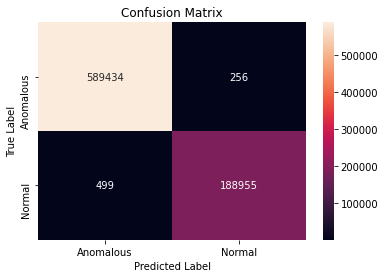

In [0]:
cm = confusion_matrix(test_Y, y_pred_xgbc_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()